In [1]:
from keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_word=200)

print(train_input.shape, test_input.shape)

2025-11-30 15:46:21.814363: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-30 15:46:21.840417: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-30 15:46:22.784727: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-30 15:46:26.489488: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(25000,) (25000,)


In [3]:
print(len(train_input[0]))
print(len(train_input[1]))
print(train_input[0])
print(train_input[:20])


218
189
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[list([1, 14, 22, 16, 43, 53

In [4]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input,train_target, test_size=0.2, random_state=42)

In [5]:
import numpy as np 
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))


239.00925 178.0


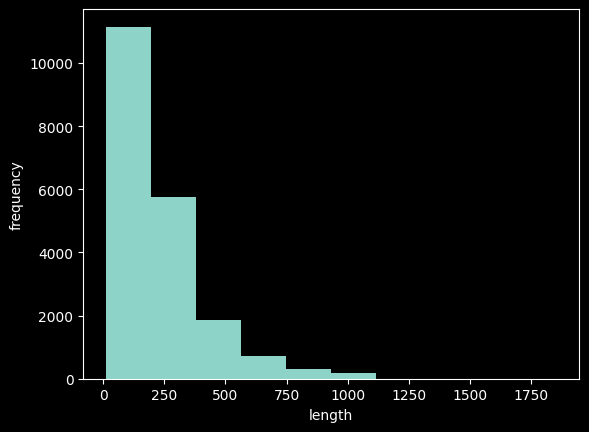

In [6]:
import matplotlib.pyplot as plt 
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10:])
print(train_seq[5])

val_seq = pad_sequences(val_input, maxlen=100)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

NUM_CLASSES = 200

model = keras.Sequential([
    keras.layers.Input(shape=(100, 200)),
    keras.layers.SimpleRNN(8),
    keras.layers.Dense(1, activation='sigmoid')
])

# 출력 확인용: 샘플 1개만 원-핫
probe = to_categorical(train_seq[:1], num_classes=NUM_CLASSES).astype('float32')
print(probe.shape)
print(probe[0][0][:12])

# 학습용: 배치마다 즉석 one-hot
def oh_map(x, y):
    x = tf.one_hot(x, depth=NUM_CLASSES, dtype=tf.float32)  # (B, 100, 200)
    y = tf.cast(y, tf.float32)                               # (B,)
    return x, y
    x = tf.one_hot(x, depth=NUM_CLASSES, dtype=tf.float32)  # (B, 100, 200)
    y = tf.cast(y, tf.float32)                               # (B,)
    return x, y

IndexError: index 540 is out of bounds for axis 1 with size 200

In [15]:
(train_input,train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

train_seq = pad_sequences(train_input, maxlen=100)
val_Seq = pad_sequences(val_input, maxlen=100)

model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500,16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

model_emb.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'], lavel='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


Epoch 1/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5903 - loss: 0.6708

2025-11-30 16:45:58.705782: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[18,80] = 722 is not in [0, 500)
	 [[{{function_node __inference_one_step_on_data_7745}}{{node sequential_6_1/embedding_1/GatherV2}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_6_1/embedding_1/GatherV2 defined at (most recent call last):
  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 758, in start

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/utils.py", line 71, in preserve_context

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 614, in shell_main

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 366, in execute_request

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 827, in execute_request

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 458, in do_execute

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 663, in run_cell

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_3754/3162627417.py", line 4, in <module>

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 423, in fit

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 511, in evaluate

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 241, in function

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in multi_step_on_iterator

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 125, in wrapper

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 134, in one_step_on_data

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 93, in test_step

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/models/sequential.py", line 220, in call

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/models/functional.py", line 183, in call

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/function.py", line 206, in _run_through_graph

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/models/functional.py", line 644, in call

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py", line 158, in call

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/numpy.py", line 6193, in take

  File "/home/sujkim/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/numpy.py", line 2589, in take

indices[18,80] = 722 is not in [0, 500)
	 [[{{node sequential_6_1/embedding_1/GatherV2}}]] [Op:__inference_multi_step_on_iterator_7770]